# Principal Component Analysis (PCA)

**Note:**
 - Used in exploritory data analysis (EDA)
 - Visualize distance and relatedness between populations.
 
 
 - Method:
     - Egenvalue decomposition of a data covariance (or correlation) matrix.
     - Singular value decomposition of a data matrix (After mean centering / normalization) for each attribute
 
 
 - Output:
     - Component scores, sometimes called factor scores (the transformaed variable values)
     - loadings (the weights)
 - Data compression and information preservation
 - Visualization
 - Noise filtering
 - Feature extraction and engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T

In [5]:
X[:, 0] = -X[:, 0]

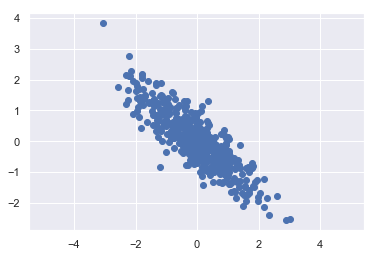

In [6]:
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.components_)

[[-0.74062812  0.67191517]
 [-0.67191517 -0.74062812]]


In [11]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]
